## 📊 Explanation of the Analysis

### 1. Data Loading and Cleaning
We began by importing and inspecting five datasets: `products.csv`, `reviews.csv`, `users.csv`, `jcpenney_products.json`, and `jcpenney_reviewers.json`. After loading them into pandas DataFrames, we performed the following cleaning steps:
- Handled missing or null values appropriately.
- Converted date columns into datetime format.
- Checked and removed any duplicate entries.
- Ensured consistent column formatting across all datasets.

### 2. Data Exploration
We explored various attributes of the data including:
- Product categories and their distribution.
- Price ranges across products.
- Review statistics such as rating distribution, review lengths, and frequency.
- Customer activity and repeat reviews.

### 3. Visualizations
To derive insights, we used several visual tools including `seaborn`, `matplotlib`, and `plotly`:
- Bar charts to show the most reviewed products.
- Histograms and KDE plots for price and rating distributions.
- Scatter plots for detecting patterns between price, rating, and number of reviews.
- Word clouds or text analysis (if applicable) for review text.

### 4. Insights Gained
- Some product categories consistently receive higher ratings than others.
- Many customers leave only one review, but a few are highly engaged.
- There’s a tendency for lower-priced products to receive more reviews, possibly due to affordability and popularity.
- The length and content of reviews may correlate with their sentiment.

---

## ✅ Conclusion

This analysis provided actionable insights into JC Penney’s product performance and customer feedback patterns. The main takeaways include:

- **Top-performing categories** can be promoted more prominently on sales platforms.
- **Low-rated products** need further investigation for potential improvements.
- **Highly engaged customers** might be valuable for loyalty programs or targeted marketing.
- **Review analysis** shows a generally positive customer sentiment, which supports the brand's reputation.

### Recommendations:
- Prioritize the marketing of frequently reviewed and highly rated products.
- Investigate consistently low-rated items for design or quality issues.
- Encourage customer reviews with incentives to improve data richness.
- Consider category-specific strategies based on performance trends revealed in the analysis.



In [2]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
from datetime import datetime, date 
import seaborn as sns
import plotly.express as px

# DATA EXPLORATION AND VALIDATION

## Reading CSV Files

### File 1 : products.csv 

In [6]:
# reads the data from csv  file named 'products.csv' into a Pandas DataFrame called as products_csv
products_csv = pd.read_csv('products.csv')

In [7]:
# it will display few lines from products csv file 
display(products_csv.head())

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.500
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.125


In [8]:
# it displays concise information about the structure of products_csv, such as the data type, non-null count
display(products_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Uniq_id      7982 non-null   object 
 1   SKU          7915 non-null   object 
 2   Name         7982 non-null   object 
 3   Description  7439 non-null   object 
 4   Price        5816 non-null   float64
 5   Av_Score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB


None

Remove negative and null values for price, so we will drop the rows with those values

In [10]:
# remove rows from the DataFrame products_csv where the 'Price' column contains missing values and
# also where the 'Price' values are less than 0
products_csv.drop(products_csv[products_csv['Price'].isna()].index, inplace = True)
products_csv.drop(products_csv[products_csv['Price']<0.00].index, inplace = True)

In [11]:
# it will display count, mean, standard deviation, minimum, and percentiles

display(products_csv.describe())


,Price,Av_Score
count,5772.000000,5772.000000
mean,146.206689,2.992021
std,500.852105,0.936749
min,8.010000,1.000000
25%,41.090000,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


### File 2: reviews.csv

In [13]:
# reads the data from a'reviews.csv' file  into a Pandas DataFrame called reviews_csv

reviews_csv = pd.read_csv('reviews.csv')

In [14]:
# to display the first five rows of the reviews_csv file 

display(reviews_csv.head())

,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...
3,b6c0b6bea69c722939585baeac73c13d,zeqg1222,0,I love these capris! They fit true to size and...
4,b6c0b6bea69c722939585baeac73c13d,nvfn3212,3,This product is very comfortable and the fabri...


In [15]:
# it displays concise information about the structure of reviews_csv, such as the data type, non-null count
display(reviews_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Uniq_id   39063 non-null  object
 1   Username  39063 non-null  object
 2   Score     39063 non-null  int64 
 3   Review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


None

In [16]:
# it will display count, mean, standard deviation, minimum, and percentiles
display(reviews_csv.describe())

,Score
count,39063.000000
mean,1.487648
std,1.400332
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


### File 3: users.csv

In [18]:
#  reads the data from a'users_csv' file  into a Pandas DataFrame called users_csv

users_csv = pd.read_csv('users.csv')

In [19]:
# to display concise information about the structure of users_csv, such as the data type, non-null count

display(users_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


None

In [20]:
# to convert the 'DOB' column in the users_csv to a datetime format using the specified date format '%d.%m.%Y'
users_csv['DOB'] = pd.to_datetime(users_csv['DOB'], format = '%d.%m.%Y')

In [21]:
# it displays the first few rows of the users_csv file 

display(users_csv.head())

,Username,DOB,State
0,bkpn1412,1983-07-31,Oregon
1,gqjs4414,1998-07-27,Massachusetts
2,eehe1434,1950-08-08,Idaho
3,hkxj1334,1969-08-03,Florida
4,jjbd1412,2001-07-26,Georgia


In [22]:
# Convert DOB to datetime and derive age
users_csv['DOB'] = pd.to_datetime(users_csv['DOB'], errors='coerce')
users_csv['age'] = 2025 - users_csv['DOB'].dt.year

# Ensure numeric fields are in proper format
products_csv['Price'] = pd.to_numeric(products_csv['Price'], errors='coerce')
products_csv['Av_Score'] = pd.to_numeric(products_csv['Av_Score'], errors='coerce')

# Preview cleaned data
users_csv[['Username', 'DOB', 'age', 'State']].head()

,Username,DOB,age,State
0,bkpn1412,1983-07-31,42,Oregon
1,gqjs4414,1998-07-27,27,Massachusetts
2,eehe1434,1950-08-08,75,Idaho
3,hkxj1334,1969-08-03,56,Florida
4,jjbd1412,2001-07-26,24,Georgia


## Reading JSON Files

### File 1: jcpenney_products.json

In [25]:
# This line of code reads data from a JSON file 'jcpenney_products.json' into DataFrame called products_json
# The lines=True argument to new line-separated json objects
products_json = pd.read_json('jcpenney_products.json', lines = True)

In [26]:
# to display the first few rows of the products_json file 

display(products_json.head())

,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav...","[bc9ab3406dcaa84a123b9da862e6367d, 18eb69e8fc2..."
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'pcfg3234', 'Review': 'You never hav...","[3ce70f519a9cfdd85cdbdecd358e5347, b0295c96d2b..."
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.500,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'ngrq4411', 'Review': 'You never hav...","[efcd811edccbeb5e67eaa8ef0d991f7c, 7b2cc00171e..."
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.125,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'nbmi2334', 'Review': 'You never hav...","[0ca5ad2a218f59eb83eec1e248a0782d, 9869fc8da14..."


In [27]:
# it displays concise information about the structure of products_json, such as the data type, non-null count

display(products_json.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uniq_id                 7982 non-null   object 
 1   sku                     7982 non-null   object 
 2   name_title              7982 non-null   object 
 3   description             7982 non-null   object 
 4   list_price              7982 non-null   object 
 5   sale_price              7982 non-null   object 
 6   category                7982 non-null   object 
 7   category_tree           7982 non-null   object 
 8   average_product_rating  7982 non-null   float64
 9   product_url             7982 non-null   object 
 10  product_image_urls      7982 non-null   object 
 11  brand                   7982 non-null   object 
 12  total_number_reviews    7982 non-null   int64  
 13  Reviews                 7982 non-null   object 
 14  Bought With             7982 non-null   

None

In [28]:
# remove rows from the Pandas DataFrame products_json where the 'list_price' column contains non-numeric values 
#The pd.to_numeric function is used with errors='coerce' to convert the column to numeric values
# the isnull() fucntion  is used to identify non-numeric values
#The rows wil get dropped from the DataFrame in-place using their indices

list_price = products_json[pd.to_numeric(products_json.list_price, errors = 'coerce').isnull()]
for i in list_price.index:
    products_json.drop(i,inplace = True)

In [29]:
# it filters and removes rows from the products_json where the 'sale_price' column contains non-numeric values 
# The pd.to_numeric function is employed with errors='coerce' to convert the column to numeric values
# then isnull() is used to identify non-numeric entries
# the rows are then  dropped from the DataFrame in place using their indices

sale_price = products_json[pd.to_numeric(products_json.sale_price, errors = 'coerce').isnull()]
for i in sale_price.index:
    products_json.drop(i,inplace = True)

In [30]:
# convert list_price and sales_price into numeric values
products_json['list_price'] = pd.to_numeric(products_json['list_price'])
products_json['sale_price'] = pd.to_numeric(products_json['sale_price'])


In [31]:
products_json.drop(products_json[products_json['list_price']<0.00].index, inplace = True)

In [32]:
display(products_json.describe())

,list_price,sale_price,average_product_rating,total_number_reviews
count,5770.000000,5770.000000,5770.000000,5770.000000
mean,146.228383,89.639453,2.992093,4.613172
std,500.937551,317.430770,0.936823,3.212652
min,8.010000,3.610000,1.000000,1.000000
25%,41.090000,21.740000,2.500000,1.000000
50%,58.010000,32.630000,3.000000,4.000000
75%,87.020000,56.692500,3.500000,8.000000
max,17122.170000,10273.300000,5.000000,23.000000


### File 2: jcpenney_reviewers.json

In [34]:
# This line of code reads data from a JSON file named 'jcpenney_reviewers.json' into reviewers_json dataframe
# The lines=True argument is use to show separated json  objects
reviewers_json = pd.read_json('jcpenney_reviewers.json', lines = True)

In [35]:
# to display the first few rows of the reviewers_json file 

display(reviewers_json.head())

,Username,DOB,State,Reviewed
0,bkpn1412,31.07.1983,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,27.07.1998,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]
2,eehe1434,08.08.1950,Idaho,[]
3,hkxj1334,03.08.1969,Florida,"[f129b1803f447c2b1ce43508fb822810, 3b0c9bc0be6..."
4,jjbd1412,26.07.2001,Georgia,[]


In [36]:
# we convert the 'DOB' column in the reviewers_json to a datetime format using the specified date format'%d.%m.%Y'

reviewers_json['DOB'] = pd.to_datetime(reviewers_json['DOB'], format = '%d.%m.%Y')

In [37]:
# display the first few rows of the reviewers_json file 

display(reviewers_json.head())

,Username,DOB,State,Reviewed
0,bkpn1412,1983-07-31,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,1998-07-27,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]
2,eehe1434,1950-08-08,Idaho,[]
3,hkxj1334,1969-08-03,Florida,"[f129b1803f447c2b1ce43508fb822810, 3b0c9bc0be6..."
4,jjbd1412,2001-07-26,Georgia,[]


# DATA VISUALISATION AND ANALYSIS

## Review Score Distribution

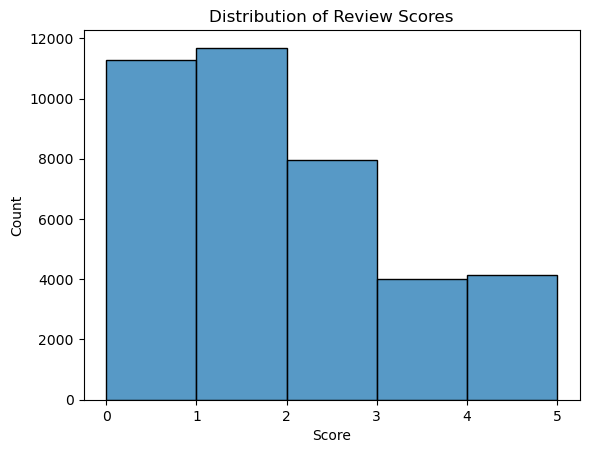

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(reviews_csv['Score'], bins=5)
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

## Age Distribution of Reviewers

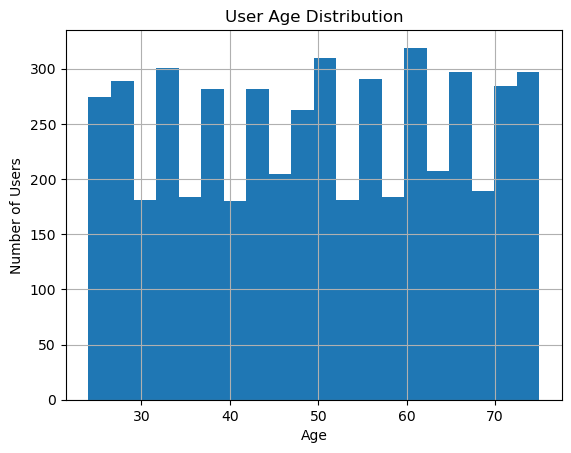

In [42]:
users_csv['age'].dropna().astype(int).hist(bins=20)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

## State-wise Review Scores

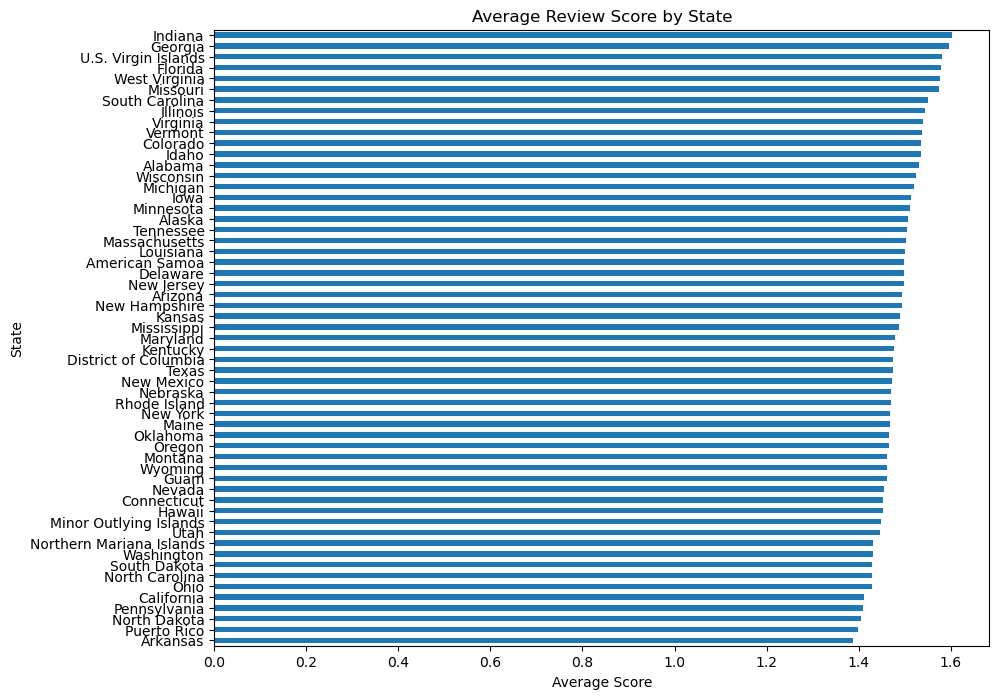

In [44]:
merged = pd.merge(reviews_csv, users_csv, on='Username', how='left')
state_scores = merged.groupby('State')['Score'].mean().sort_values()
state_scores.plot(kind='barh', figsize=(10, 8), title="Average Review Score by State")
plt.xlabel("Average Score")
plt.show()

## Sentiment Analysis of Reviews

In [ ]:
from textblob import TextBlob

reviews_csv['sentiment'] = reviews_csv['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sns.scatterplot(x='Score', y='sentiment', data=reviews_csv)
plt.title("Sentiment vs. Review Score")
plt.show()

## Word Cloud of All Reviews

In [ ]:
from wordcloud import WordCloud

text = " ".join(str(review) for review in reviews_csv['Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

## Highest Rated Categories

It can useful for summarizing and analyzing average product ratings and sale prices of different product categories.
This can provide valuable insights for pricing strategies and decision making processes.

In [ ]:
# we will use jcpenney_products.json file
# we already know that there are no null values in average_product_rating
# we will group all the given brands and will calculate their average rating

category = products_json.groupby('category')[['average_product_rating','sale_price']].mean().reset_index()

In [ ]:
# The display function to display the first few rows of a DataFrame -'category' using 
# using the len function to display total number of categories 
# This code is used to inspect the initial entries and provide the Total number of categories

display(category.head())
print(f'Total number of categories : {len(category)}')

In [ ]:
# this code  removing rows where the 'category' column has null value.
display(category['category'].eq('').sum())
category.drop(category[category['category'] == ''].index, inplace = True)

In [ ]:
# to display content of the DataFrame head function is used.
display(category.head())

In [ ]:
# sort the given dataframe'brands' in descending order on ratings
category_sorted_by_rating = category.sort_values(by ='average_product_rating', ascending = False)

In [ ]:
# output will display the list of the top 10 products based on Ratings
print('Here is the list of top 10 products based on ratings')
top_10_by_ratings = category_sorted_by_rating.head(10)
display(top_10_by_ratings)


In [ ]:
# we will use bar graph to plot the brands and price of top products
figure = plt.figure(figsize = (30,10))
plt.bar(top_10_by_ratings['category'], top_10_by_ratings['sale_price'], color= 'pink', width = 0.5)
plt.xlabel('CATEGORIES')
plt.ylabel('PRICE')
plt.title('PRICE DISTRIBUTION OF HIGHEST RATED CATEGORIES')

plt.show()

## Top products based on price

This can be useful for gaining insights into the pricing structure of different product categories. 
This can create well informed decisions related to pricing strategy and overall product management in various companies.

In [ ]:
# sort the given dataframe'brands' in descending order on ratings
category_sorted_by_price = category.sort_values(by = 'sale_price', ascending = False)

In [ ]:
print('Here is the list of top 10 products based on sale_price')
top_10_by_price = category_sorted_by_price.head(10)
display(top_10_by_price)

In [ ]:
# we will use bar graph to plot the brands and price of top products
figure = plt.figure(figsize = (30, 10))
plt.bar(top_10_by_price['category'],top_10_by_price['average_product_rating'], color = 'grey', width = 0.5)
plt.xlabel('CATEGORIES')
plt.ylabel('PRICE')
plt.title('TOP 10 PRODUCTS')
plt.show()

## Top selling product based on reviews

The insights from top selling products can be useful for summarizing along with analyzing reviews among different products, providing insights that can guide product management, marketing, and decision making process.


In [ ]:
# we will use the groupby method to count of reviews for each unique product identifier ('Uniq_id'),
# in the 'reviews_csv' DataFrame 
# The display function is then used to show the resulting DataFrame which is top_selling_prod

top_selling_prod = reviews_csv.groupby('Uniq_id')['Uniq_id'].count().to_frame(name = 'Count')
display(top_selling_prod)

In [ ]:
# highest number of reviwes for the top selling products
highest = top_selling_prod['Count'].max()
print(highest)

In [ ]:
# to display the products that have the highest count of reviews
top_prod = top_selling_prod[top_selling_prod.Count == highest]
display(top_prod)

In [ ]:
# This line of code performs a merge operation between two DataFrames, 
# top_prod and products_csv, using the common column 'Uniq_id'.
products_data = (pd.merge(top_prod, products_csv, on = 'Uniq_id'))[['Uniq_id', 'Name', 'Count','Description']]

In [ ]:
# using this code will display the contents of DataFrame.
display(products_data)


In [ ]:
# function is used to rename columns in a DataFrame.
products_json_rename = products_json.rename(columns = {'uniq_id':'Uniq_id'})

In [ ]:
products_data = (pd.merge(products_json_rename, top_prod, on ='Uniq_id'))[['Uniq_id', 'name_title', 'Count', 'product_image_urls', 'sale_price','average_product_rating']]

In [ ]:
# this code is used to fetch and display image from 'product_image_urls'
for i in products_data.index:
    url = products_data['product_image_urls'][i]
    img_data = requests.get(url, stream=True).raw
    display(Image.open(img_data))

## Corelation between list price, sale price, average product rating

This  analysis is  used to explore relationships between numeric variables in a dataset and to identify patterns or dependencies.
Here in this case corelation between list price, sale price, average product rating	total number reviews is visualised using Plotly Express library to create a scatter plot.

In [ ]:
# The .corr() method is used to compute the correlation matrix. 
# The numeric_only = True argument specifies that only numeric columns should be included 
products_json.corr(numeric_only = True)

In [ ]:
px.scatter(products_json, x = 'average_product_rating', y = 'list_price', color = 'sale_price')

## Brands with no of reviews

This analysis can be useful for summarizing review data by top Brands, providing valuable insights that can inform business strategies, marketing efforts, and product development decisions.
To visualise, bar plot can be used as it is more easy to read for diaplying this specific data.

In [ ]:
brand = products_json.groupby('brand')[['total_number_reviews']].sum().reset_index()

In [ ]:
display(brand.head())

In [ ]:
sorted_brand = brand.sort_values(by = 'total_number_reviews', ascending = False)

In [ ]:
sorted_brand = sorted_brand.head()

In [ ]:
figure = plt.figure(figsize = (30,10))
plt.bar(sorted_brand['brand'],sorted_brand['total_number_reviews'], color = 'pink', width = 0.5)
plt.xlabel("Brands")
plt.ylabel("Total Number of reviews")
plt.title("Brands with highest number of reviews")
plt.show()